In [96]:
# getting familiar with the data 
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('raw_cost_data.csv')
print(data.head())
print(data['Country'].unique())
print(data['Year'].unique())


['Australia' 'India' 'Russia' 'South Africa' 'Brazil' 'China' 'Japan'
 'Canada' 'Germany' 'Mexico' 'United States' 'France']
[2013 2019 2004 2011 2015 2020 2006 2003 2000 2022 2009 2021 2001 2018
 2023 2012 2016 2017 2002 2010 2007 2008 2014 2005]


          Country  Median_Cost
11         France     3101.600
1           India     3153.540
7          Canada     3475.250
9          Mexico     3634.785
3    South Africa     3681.350
2          Russia     3809.915
4          Brazil     3921.780
8         Germany     3972.560
10  United States     4055.090
0       Australia     4187.455
5           China     4282.275
6           Japan     4370.640


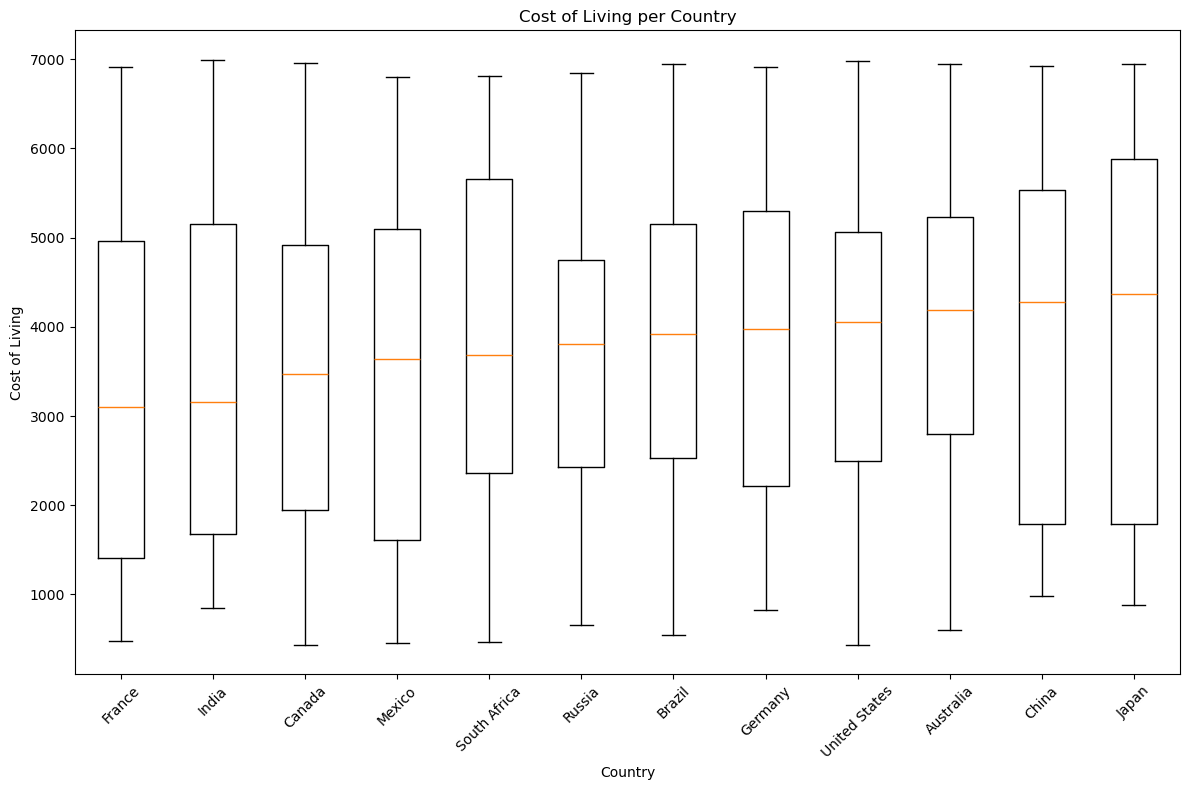

In [175]:
# What are the most cheap > expensive countries to live?

import numpy as np 
countries = data['Country'].unique()
datasets_living_cost_per_country = [] 
for country in countries:
    datasets_living_cost_per_country.append(data[data['Country'] == country].Cost_of_Living.values)

median_costs = pd.DataFrame({
    'Country': countries,
    'Median_Cost': [np.median(costs) for costs in datasets_living_cost_per_country]
}) 
median_costs = median_costs.sort_values(by='Median_Cost')
print(median_costs)
sorted_countries = median_costs['Country'].tolist()
sorted_datasets = [data[data['Country'] == country]['Cost_of_Living'].values for country in sorted_countries]

plt.figure(figsize=(12, 8))
plt.boxplot(sorted_datasets, tick_labels=sorted_countries)
plt.xlabel('Country')
plt.ylabel('Cost of Living')
plt.title('Cost of Living per Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# According to the data of past 20 years, France is the chapest country from the list with an average cost of living of 3101,6$ per month. Japan is on the other side and is the priciest place to live, with 4370,64$ of average living cost. 

          Country  Median_Tax_Rate
7          Canada           18.955
6           Japan           19.760
5           China           19.895
10  United States           20.070
4          Brazil           20.150
8         Germany           20.540
0       Australia           20.850
3    South Africa           21.190
11         France           23.690
1           India           26.085
9          Mexico           27.265
2          Russia           28.625


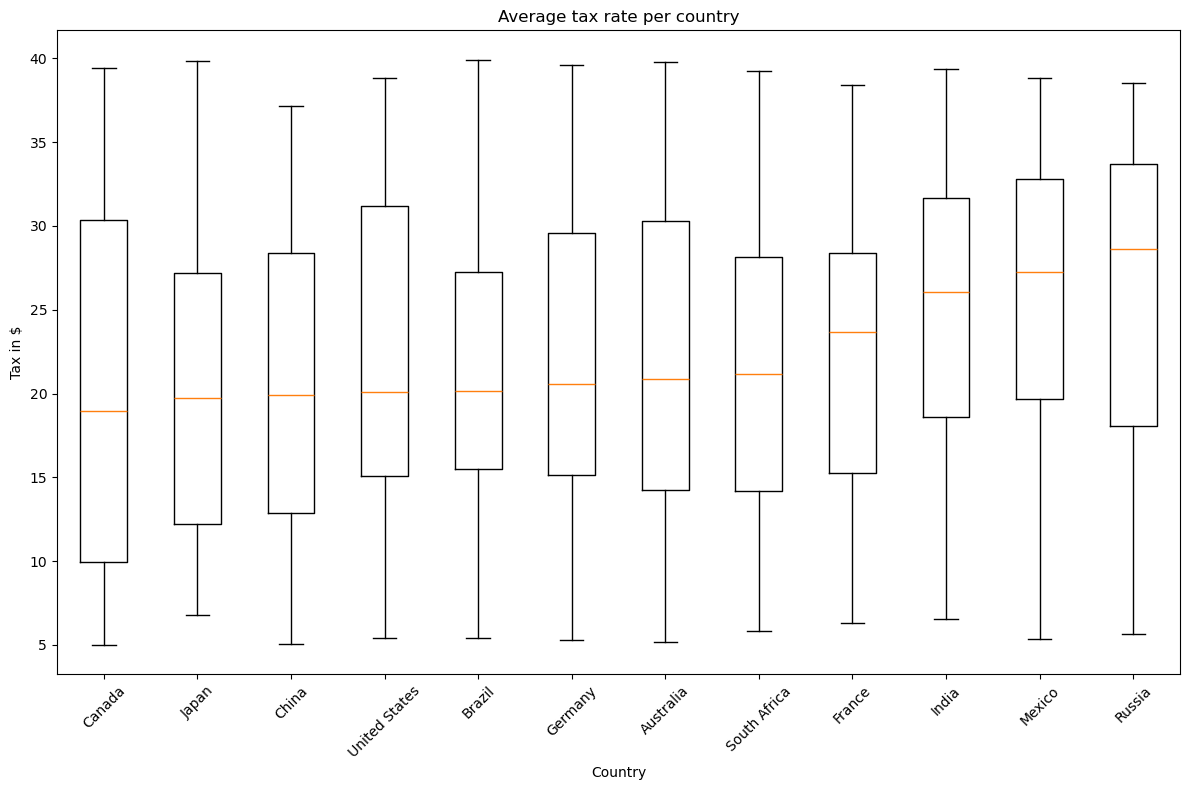

<Figure size 640x480 with 0 Axes>

In [179]:
# What if we add taxes to the equasion? Will the list look similar to spending costs?

countries = data['Country'].unique()
datasets_tax_rate_per_country = []
for country in countries:
    datasets_tax_rate_per_country.append(data[data['Country'] == country]['Tax_Rate'].values)
    
median_taxes = pd.DataFrame({
    'Country': countries,
    'Median_Tax_Rate': [np.median(tax_rates) for tax_rates in datasets_tax_rate_per_country]
}) 
median_taxes = median_taxes.sort_values(by='Median_Tax_Rate')
print(median_taxes)
sorted_countries_tax = median_taxes['Country'].tolist()
sorted_datasets_2 = [data[data['Country'] == country]['Tax_Rate'].values for country in sorted_countries_tax]

plt.figure(figsize=(12,8))
plt.boxplot(sorted_datasets_2, tick_labels = sorted_countries_tax)
plt.title('Average tax rate per country')
plt.xlabel('Country')
plt.ylabel('Tax in $')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.clf()

# Interestingly, tax rate in the most expensive country to live (Japan) is one of the lowest, with 19.76$ value. France, which was marked as the cheapest place to live, has tax rate of 23.69 which falls into the 3rd quartile. 